Problem Statement:

*To predict the approximate insurance cost based upon the rest of the features provided for each individual.*
---
---

Consider the data present in the Insurance dataset file.
Following is the attribute related information:
* **age**: age of primary beneficiary
* **sex**: insurance contractor gender, female, male
* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Smoking, yes or no
* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges**: Individual medical costs billed by health insurance


Import Requirement Packages

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from itertools import zip_longest

import warnings
warnings.filterwarnings("ignore")


Create a dataframe named 'data' from the given datafile and print it's head

In [152]:
data = pd.read_csv('/content/drive/MyDrive/Classroom/SEM2/Banking/datasets_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Exploratory Data Analysis

In [153]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [154]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Preprocessing [Data Cleaning]

In [155]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Check for Assumption

1. Assumption of Linearity

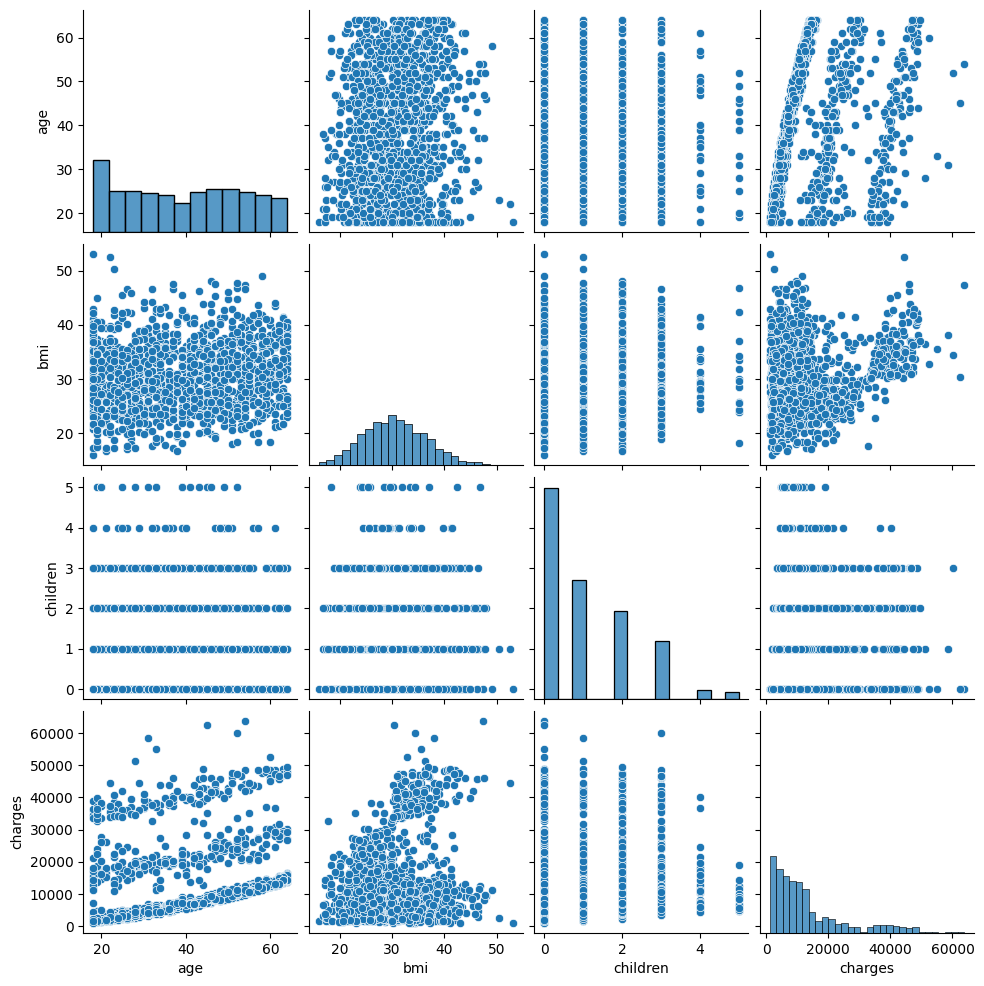

In [156]:
sns.pairplot(data = data, kind = 'scatter')

Create X and Y

In [157]:
x = data.drop(columns = 'charges')
y = data['charges']

2. Assumption of Normality


<Axes: xlabel='charges', ylabel='Count'>

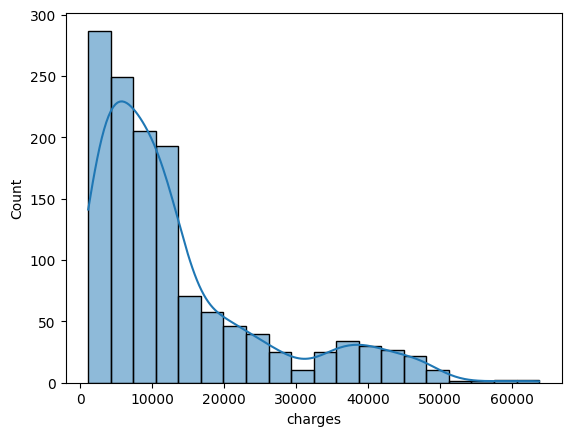

In [158]:
sns.histplot(data = y, bins = 20, kde = True)

<Axes: xlabel='charges', ylabel='Count'>

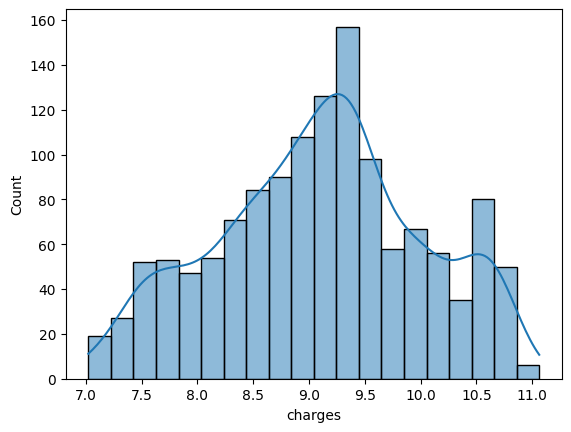

In [159]:
transformed_y = np.log(y)
sns.histplot(data = transformed_y, bins = 20, kde = True) 

Convert Categorical variables to numerical -
1. Sex: Female - 0, Male - 1
2. Smoker: No - 0, Yes - 1
3. Region: northeast - 0, northwest - 1, southeast - 2, southwest - 3

In [160]:
x['sex'].replace(['female', 'male'], [0, 1], inplace=True)
x['smoker'].replace(['no', 'yes'], [0, 1],  inplace=True)
x['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'], [0, 1, 2, 3], inplace = True)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


Checking for the normality in the X variables.


In [161]:
stat, p_value = shapiro(x)
print(f'Stats: {stat:.3f}, P_Value: {p_value:.3f}')

Stats: 0.718, P_Value: 0.000


3. Checking for Multicollinearity in the data


In [162]:
corr = x.corr()
corr

,age,sex,bmi,children,smoker,region
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000


<Axes: >

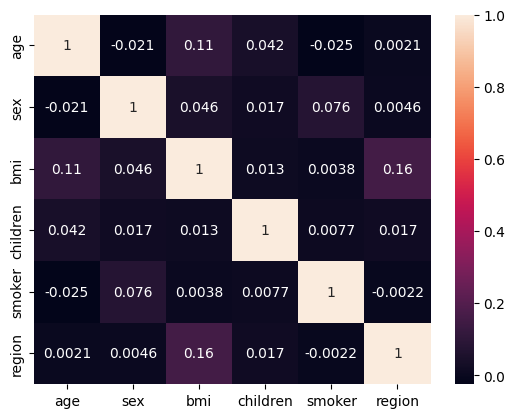

In [163]:
sns.heatmap(corr, annot = True)

In [164]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,VIF
0,7.551348
1,2.001061
2,10.371829
3,1.801245
4,1.256837
5,2.924528


In [165]:
sns

<module 'seaborn' from 'c:\\Users\\jatin\\anaconda3\\envs\\Fun\\Lib\\site-packages\\seaborn\\__init__.py'>

Split the data into train and test

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(x, transformed_y, test_size = None, random_state = 0)

In [167]:
print(f'x: {x.shape}, y:{transformed_y.shape}')

x: (1338, 6), y:(1338,)


In [168]:
print(f'X_train: {X_train.shape}, Y_train:{Y_train.shape}')

X_train: (1003, 6), Y_train:(1003,)


In [169]:
print(f'X_test: {X_test.shape}, Y_test:{Y_test.shape}')

X_test: (335, 6), Y_test:(335,)


In [170]:
X_test_1D = np.arange(0,len(X_test),1)
X_test_1D.shape

(335,)

Linear Regression Model

In [171]:
lr = LinearRegression()
lr.fit(X_train,  Y_train)

LinearRegression()

In [172]:
lr.score(X_test, Y_test)

0.787177869959049

In [173]:
print(f'Slope (A): {lr.coef_},\nIntercept (B): {lr.intercept_}')

Slope (A): [ 0.03476804 -0.04732497  0.01344008  0.09902518  1.5599583  -0.04681984],
Intercept (B): 6.994856606221452


In [174]:
zipped = list(zip_longest(lr.coef_, [lr.intercept_], fillvalue = lr.intercept_))

In [175]:
print('LR Equations: ')
for i in range(len(zipped)):
    print(f'y = ({zipped[i][0]:.3f})x + {zipped[i][1]:.3f}')

LR Equations: 
y = (0.035)x + 6.995
y = (-0.047)x + 6.995
y = (0.013)x + 6.995
y = (0.099)x + 6.995
y = (1.560)x + 6.995
y = (-0.047)x + 6.995


In [176]:
y_predict = lr.predict(X_test)

In [177]:
y_predict.shape

(335,)

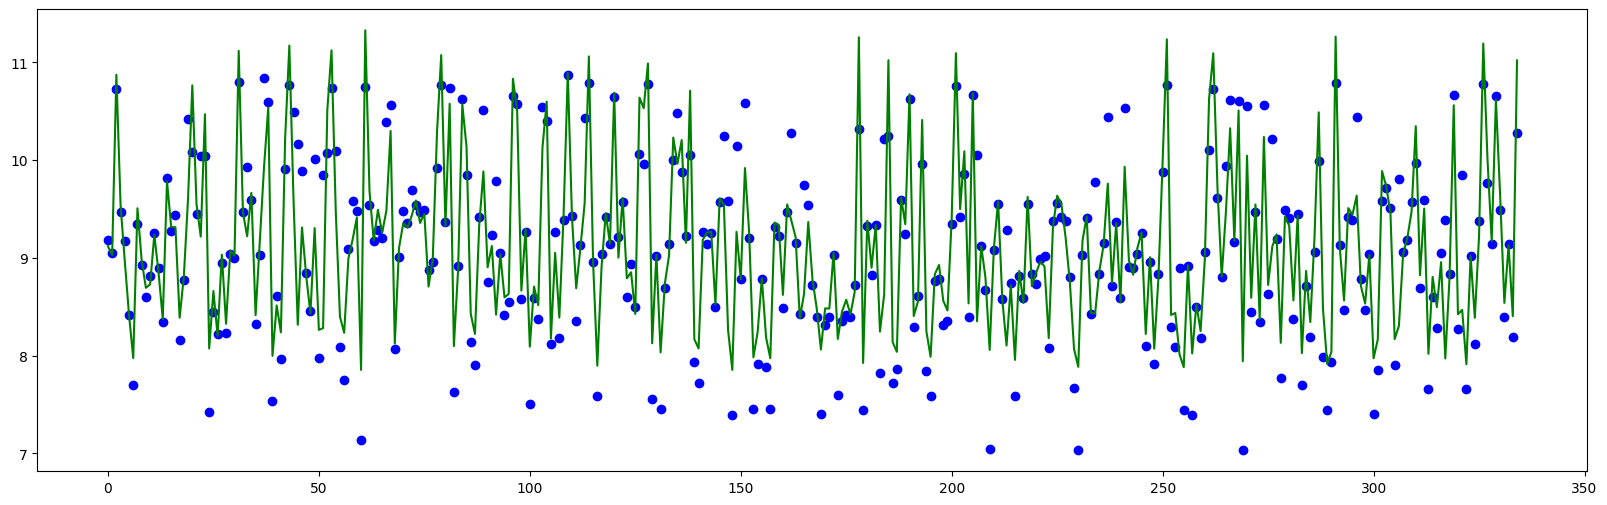

In [178]:
plt.figure(figsize = (20, 6))
plt.scatter(X_test_1D, Y_test, color ='b')
plt.plot(X_test_1D, y_predict, color ='g')
plt.show()

<Axes: >

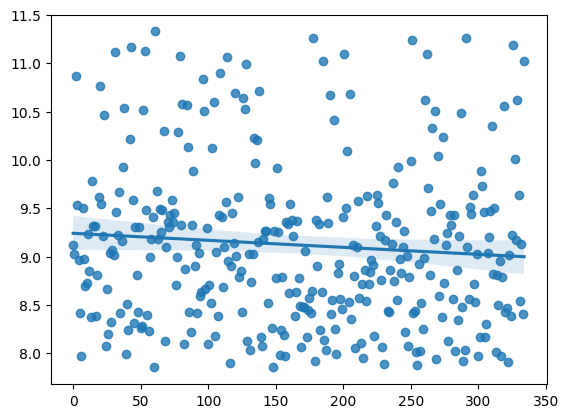

In [179]:
sns.regplot(x = X_test_1D, y = y_predict)

Evaluate the model.

Ridge and Lasso Regression.

In [180]:
scalar = StandardScaler()
Scaled_X_train = scalar.fit_transform(X_train)
Scaled_X_test = scalar.fit_transform(X_test)

In [181]:
train_score_lr = lr.score(Scaled_X_train, Y_train)
test_score_lr = lr.score(Scaled_X_test, Y_test)
print(f'Train Score: {train_score_lr}, Test Score: {test_score_lr}')

Train Score: -5.815205690234209, Test Score: -5.686855383491855


In [182]:
#Ridge Regression Model
ridgeReg = Ridge(alpha = 1.0)
ridgeReg.fit(Scaled_X_train, Y_train)
ridgeReg_Predict = ridgeReg.predict(X_test)
# print(f'Ridge Prediction:{ridgeReg_Predict}')

In [183]:
train_score_ridge = ridgeReg.score(Scaled_X_train, Y_train)
test_score_ridge = ridgeReg.score(Scaled_X_test, Y_test)
print(f'Train Score: {train_score_ridge}, Test Score: {test_score_ridge}')

Train Score: 0.759746418511731, Test Score: 0.7872794176313401


In [184]:
# plt.figure(figsize = (10, 10))
# plt.plot(X_train,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
# #plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
# plt.plot(X_train,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
# plt.xticks(rotation = 90)
# plt.legend()
# plt.show()

In [185]:
# Lasso Regression Model
lasso = Lasso(alpha = 10)
lasso.fit(X_train, Y_train)
lasso_Predict = lasso.predict(X_test)
# print(f'Lasso Prediction:{lasso_Predict}')

In [186]:
train_score_lasso = lasso.score(X_train, Y_train)
test_score_lasso = lasso.score(X_test, Y_test)
print(f'Train Score: {train_score_lasso}, Test Score: {test_score_lasso}')

Train Score: 0.0, Test Score: -2.6110983607718907e-05


In [187]:
# pd.Series(lasso.coef_, X_test_1D).sort_values(ascending = True).plot(kind = 'bar')


Stochastic Gradient Descent


In [188]:
# Stochastic Gradient Descent
SGDModel = SGDRegressor()
SGDModel.fit(X_train, Y_train)
SGD_Predict = SGDModel.predict(X_test)
# print(f'SGD prediction:{SGD_Predict}')

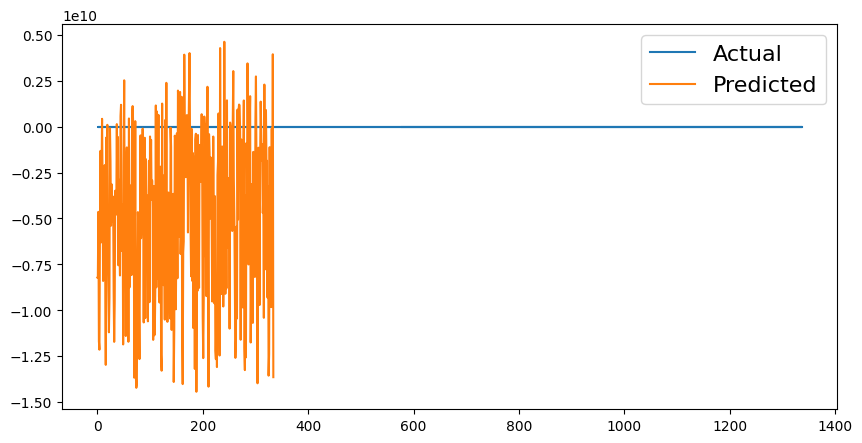

In [189]:
plt.figure(figsize=(10,5))
plt.plot(Y_test, label='Actual')
plt.plot(SGD_Predict, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
# print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

Write down your conclusion as to which is the final model that you would go with along with the reasons.

Testing Models 

In [190]:
sample_data = {
    'age':[56, 51, 31, 64, 44, 43, 56], 
    'sex':[1, 0, 1, 1, 0, 1, 1], 
    'bmi':[19.95, 18.05, 34.39, 25.6, 23.98, 32.6, 33.725], 
    'children':[0, 0, 3, 2, 2, 2, 0],
    'smoker':[1, 0, 1, 0, 0, 0, 0],
    'region':[0, 1, 1, 3, 2, 3, 1]
}
X_test_Sample = pd.DataFrame(sample_data)


In [191]:
# LR Model
lr_Predict_Sample = lr.predict(X_test_Sample)
print(f'Prediction Value Linear Reg:{lr_Predict_Sample}') 

Prediction Value Linear Reg:[10.72262977  8.96380026 10.29775915  9.57434308  8.95135415  8.93829476
  9.3009887 ]


In [192]:
# Ridge Regression 
ridgeReg_Predict_Sample = ridgeReg.predict(X_test_Sample)
print(f'Prediction Value Ridge:{ridgeReg_Predict_Sample}')

Prediction Value Ridge:[38.7027039  35.4490291  28.01571429 42.53800633 32.71593099 32.87402089
 39.17781945]


In [193]:
# Lasso Regression
lasso_Predict_Sample = lasso.predict(X_test_Sample)
print(f'Prediction Value Lasso:{lasso_Predict_Sample}')

Prediction Value Lasso:[9.09748268 9.09748268 9.09748268 9.09748268 9.09748268 9.09748268
 9.09748268]


In [194]:
# Stochastic Gradient Descent
SGD_Predict_Sample = SGDModel.predict(X_test_Sample)
print(f'Predicted Value SGD Regression: {SGD_Predict_Sample}')

Predicted Value SGD Regression: [-1.21276752e+10 -1.21549503e+10  1.12204695e+09 -1.11566071e+10
 -6.63260416e+09 -3.93993246e+09 -1.06959713e+10]


Save the predicted values along with the observations into an excel file.